# 回帰分析

## データ

### データの読み込み

米国のある大学における教員に対して支払われた9か月間の給与データを用いる.
期間は2008年から2009年. 教員の役職(助教授, 准教授,
教授)や研究分野(理論研究か応用研究か), 博士号取得からの年数, 勤務年数,
性別が含まれている. 男女の賃金格差を検証するために収集された.

In [ ]:
library(pacman)
p_load(carData)

Installing package into '/cloud/lib/x86_64-pc-linux-gnu-library/4.4'
(as 'lib' is unspecified)


carData installed

[1] "rank"          "discipline"    "yrs.since.phd" "yrs.service"  
[5] "sex"           "salary"       

### データ構造の確認

分析の前にデータの構造を確認する.

In [ ]:
p_load(dplyr)
glimpse(Salaries)

Rows: 397
Columns: 6
$ rank          <fct> Prof, Prof, AsstProf, Prof, Prof, AssocProf, Prof, Prof,…
$ discipline    <fct> B, B, B, B, B, B, B, B, B, B, B, B, B, B, B, B, B, A, A,…
$ yrs.since.phd <int> 19, 20, 4, 45, 40, 6, 30, 45, 21, 18, 12, 7, 1, 2, 20, 1…
$ yrs.service   <int> 18, 16, 3, 39, 41, 6, 23, 45, 20, 18, 8, 2, 1, 0, 18, 3,…
$ sex           <fct> Male, Male, Male, Male, Male, Male, Male, Male, Male, Fe…
$ salary        <int> 139750, 173200, 79750, 115000, 141500, 97000, 175000, 14…

### factor型データのレベルチェック

factor型データは見かけだけでなくどのような順番で定義されているかも確認しておいた方が問題を回避できる.
factor型のデータの順序を確認するためには`levels()`関数を利用する.

In [ ]:
levels(Salaries$rank)

[1] "AsstProf"  "AssocProf" "Prof"     

[1] "A" "B"

[1] "Female" "Male"  

### データの記述統計

`summary()`関数を利用してデータの記述統計を確認する.

In [ ]:
summary(Salaries)

        rank     discipline yrs.since.phd    yrs.service        sex     
 AsstProf : 67   A:181      Min.   : 1.00   Min.   : 0.00   Female: 39  
 AssocProf: 64   B:216      1st Qu.:12.00   1st Qu.: 7.00   Male  :358  
 Prof     :266              Median :21.00   Median :16.00               
                            Mean   :22.31   Mean   :17.61               
                            3rd Qu.:32.00   3rd Qu.:27.00               
                            Max.   :56.00   Max.   :60.00               
     salary      
 Min.   : 57800  
 1st Qu.: 91000  
 Median :107300  
 Mean   :113706  
 3rd Qu.:134185  
 Max.   :231545  

### データのペアプロット

データのペアプロットをして列間の関係を把握する.

Installing package into '/cloud/lib/x86_64-pc-linux-gnu-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'patchwork', 'ggstats', 'plyr'


GGally installed

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

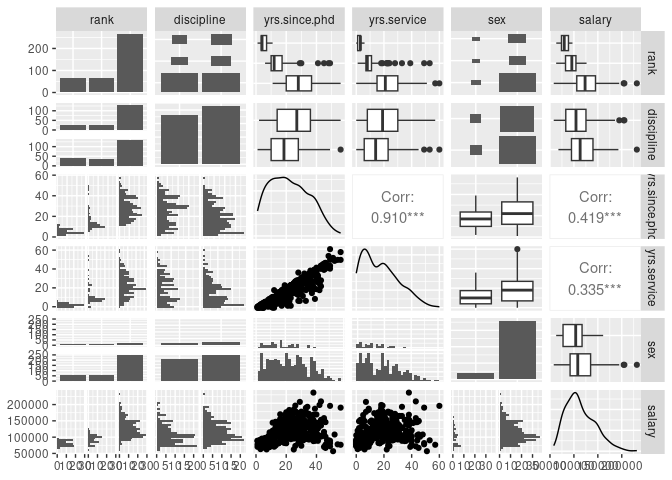

In [ ]:
p_load(ggplot2, GGally)

男女で色分けしてみる.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

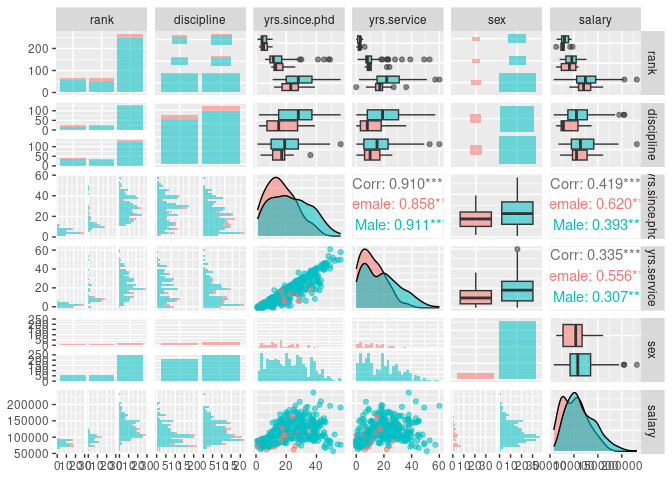

In [ ]:
ggpairs(Salaries, aes(colour = sex, alpha = 0.5))

### グラフの描画1

ペアプロットの右上のグラフをx軸とy軸を反転してggplot2で描いてみる.

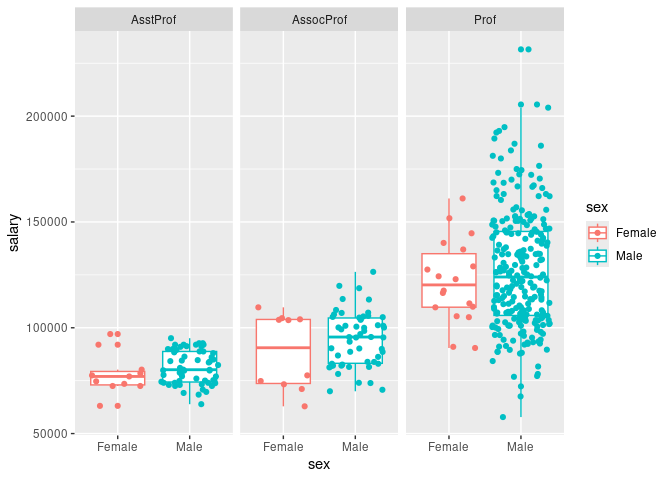

In [ ]:
ggplot(data = Salaries) +
  aes(x      = sex,
      y      = salary,
      colour = sex) +
  geom_boxplot() +
  geom_jitter() +
  facet_wrap(~rank)

### クロス集計表

男女の人数差が大きいため,
factor型データ同士で分割表(クロス集計表)を作って関係性を見る.
`xtabs()`関数を利用し, 記法は相関や回帰と同様である.

In [ ]:
cross <- xtabs(~ rank + sex, data = Salaries)
cross

           sex
rank        Female Male
  AsstProf      11   56
  AssocProf     10   54
  Prof          18  248

          sex
discipline Female Male
         A     18  163
         B     21  195

### クロス集計表(相対度数)

相対度数を見る場合は分割表を`prop.table()`関数に与える.
表全体を合計すると1の場合.

In [ ]:
prop.table(cross)

           sex
rank            Female       Male
  AsstProf  0.02770781 0.14105793
  AssocProf 0.02518892 0.13602015
  Prof      0.04534005 0.62468514

引数`margin = 1`とすると行の合計が1となり,
`margin = 2`で列の合計が1となる.

In [ ]:
prop.table(cross, margin = 2)

           sex
rank           Female      Male
  AsstProf  0.2820513 0.1564246
  AssocProf 0.2564103 0.1508380
  Prof      0.4615385 0.6927374

### 男女別給与の平均値

男女別に給与の平均値がどれくらいかを算出する.

In [ ]:
Salaries |> 
  group_by(sex) |> 
  summarise(mean = mean(salary), 
            sd   = sd(salary))

# A tibble: 2 × 3
  sex       mean     sd
  <fct>    <dbl>  <dbl>
1 Female 101002. 25952.
2 Male   115090. 30437.

### 平均値の差の検定(Studentのt検定)

男性と女性で平均値に差があるのかを検定する.
男性と女性で給与の分散が等しい(`var.equal = TRUE`)と仮定する.

In [ ]:
t.test(salary ~ sex,   
       data      = Salaries,
       var.equal = TRUE)


    Two Sample t-test

data:  salary by sex
t = -2.7817, df = 395, p-value = 0.005667
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -24044.910  -4131.107
sample estimates:
mean in group Female   mean in group Male 
            101002.4             115090.4 

### 平均値の差の検定(Welchのt検定)

男性と女性で平均値に差があるのかを検定する.
男性と女性で給与の分散が等しいと仮定を置かない(`var.equal = FALSE`).

In [ ]:
t.test(salary ~ sex,
       data      = Salaries,
       var.equal = FALSE)


    Welch Two Sample t-test

data:  salary by sex
t = -3.1615, df = 50.122, p-value = 0.002664
alternative hypothesis: true difference in means between group Female and group Male is not equal to 0
95 percent confidence interval:
 -23037.916  -5138.102
sample estimates:
mean in group Female   mean in group Male 
            101002.4             115090.4 

### 回帰分析(単回帰: ダミー変数のみ)

まずはじめに性別のみを説明変数とする単回帰分析を行う.
ダミー変数のみを説明変数とする単回帰分析の結果はStudentのt検定の結果と一致する.

In [ ]:
model1 <- lm(salary ~ sex, data = Salaries)
p_load(jtools)
summ(model1, confint = T)

MODEL INFO:
Observations: 397
Dependent Variable: salary
Type: OLS linear regression 

MODEL FIT:
F(1,395) = 7.74, p = 0.01
R² = 0.02
Adj. R² = 0.02 

Standard errors:OLS
--------------------------------------------------------------------
                         Est.       2.5%       97.5%   t val.      p
----------------- ----------- ---------- ----------- -------- ------
(Intercept)         101002.41   91547.22   110457.60    21.00   0.00
sexMale              14088.01    4131.11    24044.91     2.78   0.01
--------------------------------------------------------------------

### 回帰係数の図示

回帰分析の結果は表だけでなく, グラフ化するとわかりやすい.

Installing package into '/cloud/lib/x86_64-pc-linux-gnu-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'sys', 'askpass', 'curl', 'openssl', 'later', 'assertthat', 'htmlwidgets', 'xts', 'httr', 'lazyeval', 'crosstalk', 'promises', 'reshape2', 'useful', 'dygraphs', 'plotly'


coefplot installed

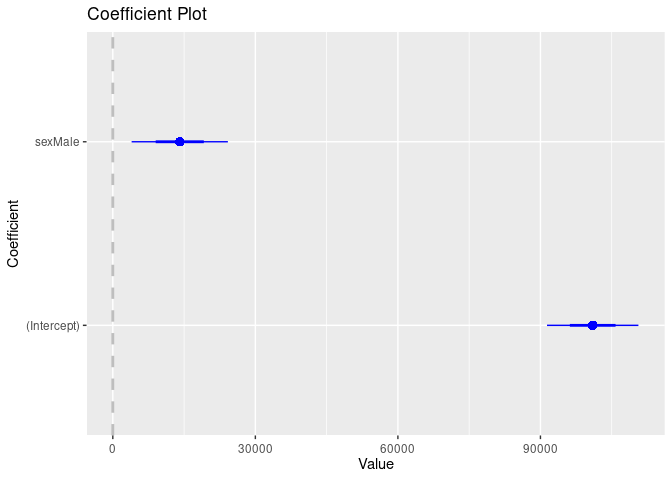

In [ ]:
p_load(coefplot)

### 回帰分析(フルモデル)

とりあえず全ての変数を投入して重回帰分析を行う.
データフレーム内の全ての変数を説明変数とするときには`lm(y ~ .)`のように`.`を利用する.

多重共線性の疑い(Ph.D取得からの年数($\simeq$ 年齢)と勤続年数)がある.
勤続年数が長いほど給与が減少するという結果になっている.

In [ ]:
model2 <- lm(salary ~ ., data = Salaries)
summ(model2, vifs = TRUE)

MODEL INFO:
Observations: 397
Dependent Variable: salary
Type: OLS linear regression 

MODEL FIT:
F(6,390) = 54.20, p = 0.00
R² = 0.45
Adj. R² = 0.45 

Standard errors:OLS
---------------------------------------------------------------
                          Est.      S.E.   t val.      p    VIF
------------------- ---------- --------- -------- ------ ------
(Intercept)           65955.23   4588.60    14.37   0.00       
rankAssocProf         12907.59   4145.28     3.11   0.00   2.01
rankProf              45066.00   4237.52    10.63   0.00   2.01
disciplineB           14417.63   2342.88     6.15   0.00   1.06
yrs.since.phd           535.06    240.99     2.22   0.03   7.52
yrs.service            -489.52    211.94    -2.31   0.02   5.92
sexMale                4783.49   3858.67     1.24   0.22   1.03
---------------------------------------------------------------

### 結果の図示

回帰分析の結果は表だけでなく, グラフ化するとわかりやすい.
結果のグラフ化には`coefplot`パッケージの`coefplot()`関数が便利.

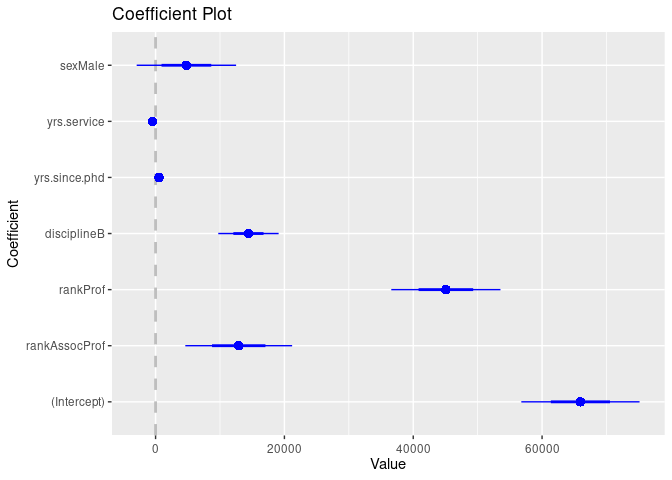

In [ ]:
coefplot(model2)

### 回帰分析(除く勤続年数年数)

勤続年数を除いて推計する.

In [ ]:
model3 <- lm(salary ~ rank + discipline + yrs.since.phd + sex,
             data = Salaries)
summ(model3)

MODEL INFO:
Observations: 397
Dependent Variable: salary
Type: OLS linear regression 

MODEL FIT:
F(5,391) = 63.27, p = 0.00
R² = 0.45
Adj. R² = 0.44 

Standard errors:OLS
--------------------------------------------------------
                          Est.      S.E.   t val.      p
------------------- ---------- --------- -------- ------
(Intercept)           67884.32   4536.89    14.96   0.00
rankAssocProf         13104.15   4167.31     3.14   0.00
rankProf              46032.55   4240.12    10.86   0.00
disciplineB           13937.47   2346.53     5.94   0.00
yrs.since.phd            61.01    127.01     0.48   0.63
sexMale                4349.37   3875.39     1.12   0.26
--------------------------------------------------------

### 回帰分析(前提知識からのモデルの検討)

女性であるがゆえに昇進できないとすると`rank`を除いた方がより女性であることによって給与に差があるのかを評価ができる.
`rank`が含まれていると女性であるがゆえに昇進できないことは評価できず,
同じ職階の時に性別によって年収に差が出るのかを検証する.

In [ ]:
model4 <- lm(salary ~ discipline + yrs.since.phd + sex,
             data = Salaries)
summ(model4)

MODEL INFO:
Observations: 397
Dependent Variable: salary
Type: OLS linear regression 

MODEL FIT:
F(3,393) = 42.43, p = 0.00
R² = 0.24
Adj. R² = 0.24 

Standard errors:OLS
--------------------------------------------------------
                          Est.      S.E.   t val.      p
------------------- ---------- --------- -------- ------
(Intercept)           74535.06   4932.11    15.11   0.00
disciplineB           15626.35   2730.40     5.72   0.00
yrs.since.phd          1093.28    106.85    10.23   0.00
sexMale                6956.35   4509.19     1.54   0.12
--------------------------------------------------------

### 分散不均一の考慮

Welchのt検定のように分散不均一を考慮する際には`estimatr`パッケージの`lm_robust()`関数を利用すると分散不均一を補正した標準誤差を計算できる.

In [ ]:
p_load(estimatr)

Installing package into '/cloud/lib/x86_64-pc-linux-gnu-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'Formula', 'RcppEigen'


estimatr installed


Call:
lm_robust(formula = salary ~ discipline + yrs.since.phd + sex, 
    data = Salaries, se_type = "HC3")

Standard error type:  HC3 

Coefficients:
              Estimate Std. Error t value  Pr(>|t|) CI Lower CI Upper  DF
(Intercept)      74535     3726.9  19.999 7.038e-62  67207.8    81862 393
disciplineB      15626     2682.3   5.826 1.185e-08  10352.9    20900 393
yrs.since.phd     1093      123.6   8.842 3.194e-17    850.2     1336 393
sexMale           6956     3183.9   2.185 2.949e-02    696.7    13216 393

Multiple R-squared:  0.2447 ,   Adjusted R-squared:  0.2389 
F-statistic: 37.62 on 3 and 393 DF,  p-value: < 2.2e-16

分散不均一を補正した結果は`summ()`関数の中で`robust`の引数を指定することでも表示できる.

In [ ]:
summ(model1, robust = "HC3")

MODEL INFO:
Observations: 397
Dependent Variable: salary
Type: OLS linear regression 

MODEL FIT:
F(1,395) = 7.74, p = 0.01
R² = 0.02
Adj. R² = 0.02 

Standard errors: Robust, type = HC3
-------------------------------------------------------
                         Est.      S.E.   t val.      p
----------------- ----------- --------- -------- ------
(Intercept)         101002.41   4209.99    23.99   0.00
sexMale              14088.01   4507.66     3.13   0.00
-------------------------------------------------------

### 回帰分析(交互作用項)

交互作用項を追加する. 交互作用項を追加するには,
交互作用を追加したい変数同士を`*`でつなぐ.
今回は役職の博士号取得からの年数に与える効果は研究分野によって異なることを検討する.
連続変数を一般的には中心化するがここでは省略.

In [ ]:
model5 <- lm(salary ~ rank + discipline * yrs.since.phd + sex,
             data = Salaries)
summ(model5)

MODEL INFO:
Observations: 397
Dependent Variable: salary
Type: OLS linear regression 

MODEL FIT:
F(6,390) = 52.71, p = 0.00
R² = 0.45
Adj. R² = 0.44 

Standard errors:OLS
--------------------------------------------------------------------
                                      Est.      S.E.   t val.      p
------------------------------- ---------- --------- -------- ------
(Intercept)                       69396.69   5111.58    13.58   0.00
rankAssocProf                     12916.95   4180.55     3.09   0.00
rankProf                          45684.70   4277.53    10.68   0.00
disciplineB                       11286.22   4739.18     2.38   0.02
yrs.since.phd                         8.33    151.15     0.06   0.96
sexMale                            4464.13   3882.39     1.15   0.25
disciplineB:yrs.since.phd           117.79    182.89     0.64   0.52
--------------------------------------------------------------------

### 係数の解釈

回帰分析の係数の解釈は他の変数を一定としたとき,
その変数が1単位増加した時にどれだけ応答変数が変化するか.
交互作用項を加えた際には他の変数を一定とするの解釈が難しい.
理論研究を行う学部の教員における年数の効果を調べる.

In [ ]:
model5$coefficients[5]

yrs.since.phd 
     8.331704 

応用研究を行う学部の教員における年数の効果を調べる. なお,
今回は交互作用項は有意ではない.

In [ ]:
model5$coefficients[5] + model5$coefficients[7]

yrs.since.phd 
      126.121 

### 限界効果のプロット1

教員が所属する学部の分野によって博士号取得からの年数の係数がどれだけ変化するかを図示する.
`interplot`パッケージが便利.

Installing package into '/cloud/lib/x86_64-pc-linux-gnu-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'minqa', 'nloptr', 'lme4', 'abind', 'arm', 'interactionTest'


interplot installed

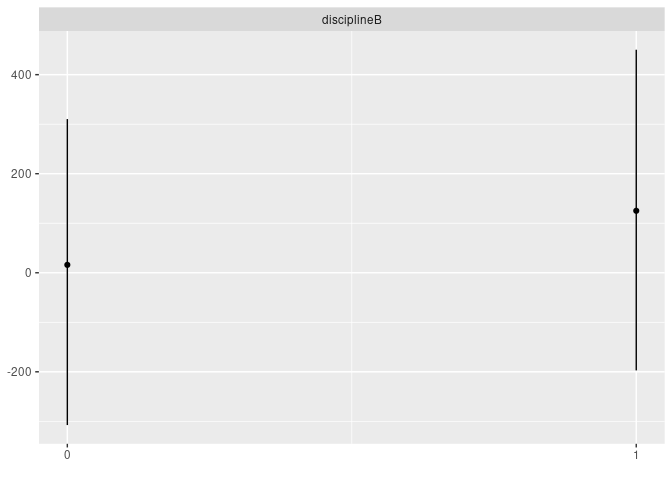

In [ ]:
p_load(interplot)

博士号取得からの年数によって教員が所属する学部の分野の係数どれだけ変化するかを図示する.

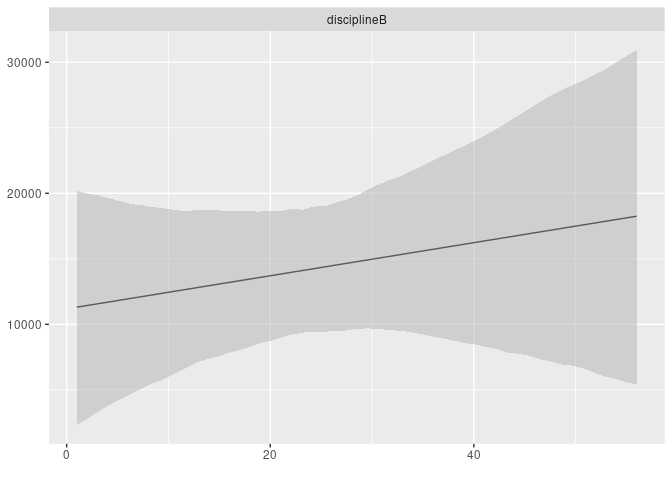

In [ ]:
interplot(
  model5,
  var1 = "discipline",
  var2 = "yrs.since.phd"
  )

### モデルの比較

`stargazer`パッケージを使って結果を表にまとめる.

In [ ]:
p_load(stargazer)
stargazer(model1, model2, model3, model4, model5,
          type              = "text",
          style             = "all",
          star.cutoffs      = NA,
          omit.table.layout = 'n',
          ci                = TRUE,
          align             = TRUE)


                                                                                                  Dependent variable:                                                                        
                          -------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                        salary                                                                               
                                        (1)                             (2)                              (3)                              (4)                              (5)               
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
rankAssocProf                                    

### AIC

AICを各モデルで算出する.

In [ ]:
AIC(model1, model2, model3, model4, model5)

       df      AIC
model1  3 9316.856
model2  8 9093.826
model3  7 9097.220
model4  5 9217.169
model5  8 9098.798

### BIC

BICを各モデルで算出する.

In [ ]:
BIC(model1, model2, model3, model4, model5)

       df      BIC
model1  3 9328.808
model2  8 9125.698
model3  7 9125.108
model4  5 9237.089
model5  8 9130.669

### モデルの整理

`caret`パッケージでまとめてLOOCVを行うためにモデルを整理する.

In [ ]:
p_load(tibble)
models <- c(salary ~ sex,
            salary ~ .,
            salary ~ rank + discipline + yrs.since.phd + sex,
            salary ~ discipline + yrs.since.phd + sex,
            salary ~ rank + discipline * yrs.since.phd + sex) |> 
  magrittr::set_names(c("model1", "model2", "model3", "model4", "model5")) |>
  tibble::enframe(name = "model_index", value = "formula")

### LOOCVの実行

`purrr`パッケージなどを用いてまとめてLOOCVを行う..

In [ ]:
p_load(purrr, caret, tidyr)

Installing package into '/cloud/lib/x86_64-pc-linux-gnu-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'shape', 'future.apply', 'numDeriv', 'progressr', 'SQUAREM', 'diagram', 'lava', 'prodlim', 'timechange', 'proxy', 'iterators', 'clock', 'gower', 'hardhat', 'ipred', 'lubridate', 'timeDate', 'e1071', 'foreach', 'ModelMetrics', 'pROC', 'recipes'


caret installed

ℹ Please use `cols = c(results)`.

# A tibble: 5 × 5
  model_index intercept   RMSE Rsquared    MAE
  <chr>       <lgl>      <dbl>    <dbl>  <dbl>
1 model1      TRUE      30094.   0.0114 24553.
2 model2      TRUE      22728.   0.436  16793.
3 model3      TRUE      22757.   0.434  16683.
4 model4      TRUE      26549.   0.230  20610.
5 model5      TRUE      22819.   0.431  16721.

### 残差のチェック: model1

Installing package into '/cloud/lib/x86_64-pc-linux-gnu-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'gridExtra'


ggfortify installed

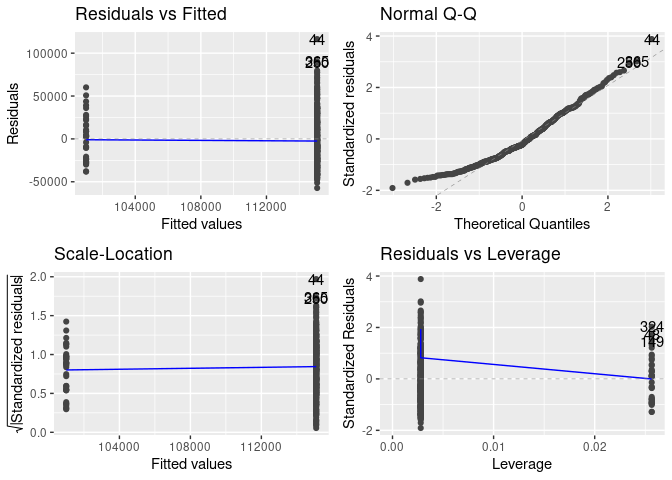

In [ ]:
p_load(ggfortify)

### 残差のチェック: model2

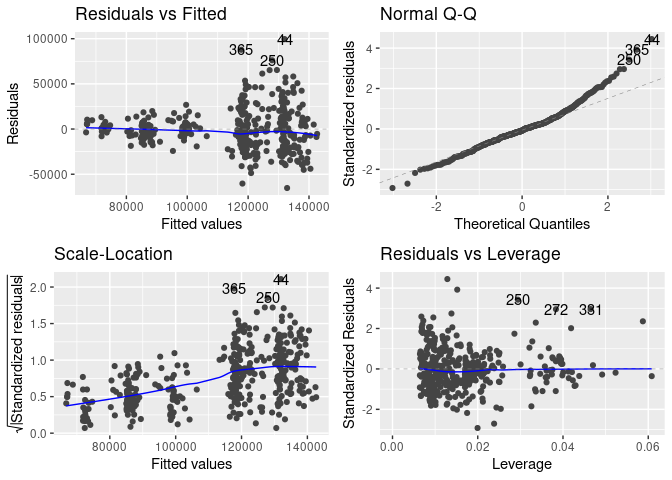

In [ ]:
autoplot(model2)

### 残差のチェック: model3

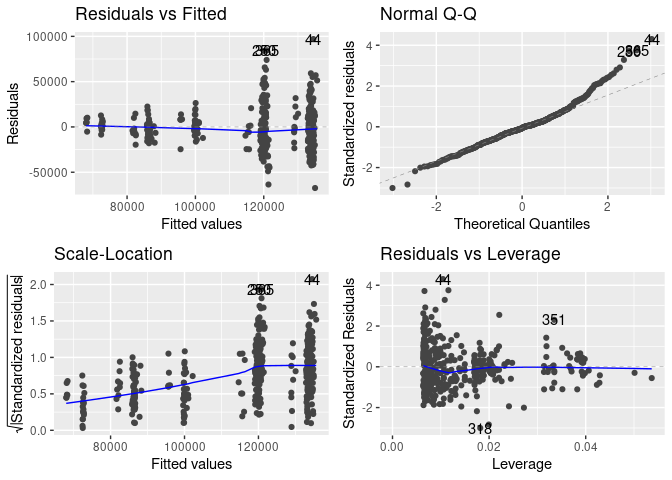

In [ ]:
autoplot(model3)

### 残差のチェック: model4

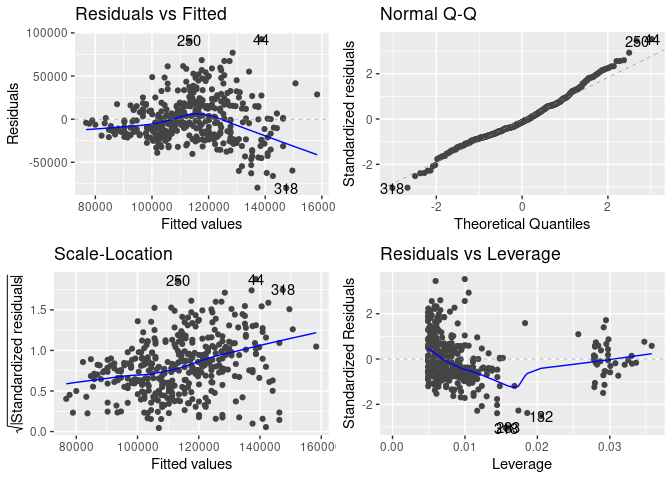

In [ ]:
autoplot(model4)

### 残差のチェック: model5

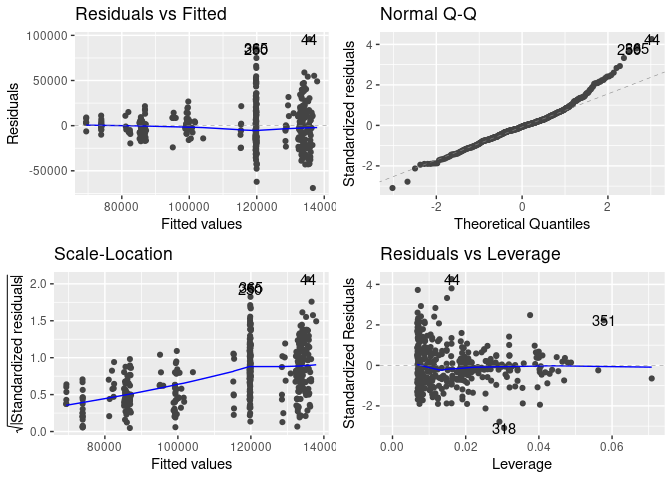

In [ ]:
autoplot(model5)